##Logistic Regression

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve,auc,classification_report


In [91]:
#load dataset
from sklearn.datasets import fetch_openml
titanic= fetch_openml(name='titanic', version=1,as_frame=True)
df= titanic.data
df['survived']=titanic.target
df


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [93]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014
embarked,2


In [94]:
#cleaning dataset
df= df.drop(columns=['cabin','boat','body','home.dest','name','ticket'])
df.dropna(subset=['embarked','fare'],inplace=True)
df['age']=df['age'].fillna(df['age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1306 non-null   int64   
 1   sex       1306 non-null   category
 2   age       1306 non-null   float64 
 3   sibsp     1306 non-null   int64   
 4   parch     1306 non-null   int64   
 5   fare      1306 non-null   float64 
 6   embarked  1306 non-null   category
 7   survived  1306 non-null   category
dtypes: category(3), float64(2), int64(3)
memory usage: 65.4 KB


In [95]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
survived,0


In [96]:
#standardarize the dataset
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
scaler= MinMaxScaler()
df['fare']=scaler.fit_transform(df[['fare']])
df['age']=scaler.fit_transform(df[['age']])

#onehot encoding
features=['sex','embarked']
onehot_encoding=OneHotEncoder(sparse_output=False,drop='first')
encoded_features= onehot_encoding.fit_transform(df[features])
encoded_df= pd.DataFrame(encoded_features,columns=onehot_encoding.get_feature_names_out(features))
encoded_df.index = df.index
df=pd.concat([df.drop(columns=features),encoded_df],axis=1)

#feature extraction
df['family']=df['sibsp'] +df['parch']+1
df.drop(columns=['sibsp','parch'],inplace=True)

In [97]:
df

,pclass,age,fare,survived,sex_male,embarked_Q,embarked_S,family
0,1,0.361169,0.412503,1,0.0,0.0,1.0,1
1,1,0.009395,0.295806,1,1.0,0.0,1.0,4
2,1,0.022964,0.295806,0,0.0,0.0,1.0,4
3,1,0.373695,0.295806,0,1.0,0.0,1.0,4
4,1,0.311064,0.295806,0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...
1304,3,0.179540,0.028213,0,0.0,0.0,0.0,2
1305,3,0.348643,0.028213,0,0.0,0.0,0.0,2
1306,3,0.329854,0.014102,0,1.0,0.0,0.0,1
1307,3,0.336117,0.014102,0,1.0,0.0,0.0,1


In [98]:
# define independent term/feature(x) and dependent term/target(y)
x= df.drop(columns=['survived'])
y=df['survived'].astype(int)


In [99]:
#split dataset for testing and training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123, stratify=y)

In [100]:
x_train


,pclass,age,fare,sex_male,embarked_Q,embarked_S,family
863,3,0.348643,0.015412,1.0,0.0,1.0,1
87,1,0.336117,0.059532,1.0,0.0,1.0,1
889,3,0.323591,0.015176,1.0,0.0,1.0,1
121,1,0.348643,0.260867,0.0,0.0,1.0,2
601,3,0.160751,0.039525,1.0,0.0,1.0,3
...,...,...,...,...,...,...,...
1161,3,0.198330,0.015713,1.0,0.0,1.0,1
100,1,0.611691,0.111118,1.0,0.0,0.0,2
911,3,0.260960,0.016461,1.0,0.0,1.0,1
893,3,0.361169,0.015330,1.0,0.0,1.0,1


In [101]:
x_test

,pclass,age,fare,sex_male,embarked_Q,embarked_S,family
1277,3,0.273486,0.014102,1.0,0.0,0.0,1
573,2,0.336117,0.020495,0.0,0.0,1.0,1
1307,3,0.336117,0.014102,1.0,0.0,0.0,1
880,3,0.361169,0.015412,1.0,0.0,0.0,1
440,2,0.599165,0.126872,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...
370,2,0.311064,0.058556,0.0,0.0,1.0,3
828,3,0.123173,0.091543,0.0,0.0,1.0,8
278,1,0.398747,0.059532,1.0,0.0,0.0,1
871,3,0.348643,0.015127,1.0,1.0,0.0,1


In [102]:
y_train

,survived
863,0
87,1
889,1
121,1
601,0
...,...
1161,0
100,1
911,0
893,0


In [103]:
y_test

,survived
1277,1
573,1
1307,0
880,1
440,1
...,...
370,1
828,0
278,1
871,0


In [104]:
#create and train binary Logistic Regression
model= LogisticRegression(max_iter=200, random_state=90)
model.fit(x_train,y_train)

LogisticRegression(max_iter=200, random_state=90)

In [105]:
#predict on test set
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:,1]

In [106]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.74
Precision: 0.66
Recall: 0.64


-> Accuracy of 0.74 means the model is correctly predicting 74% of the time.

-> Precision of 0.66 means it can accurately predicate the passangers who survived 66% of times.

-> Recall of 0.64 means that 64% of times the model can identified the actual survivors.

In [107]:
#general classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       162
           1       0.66      0.64      0.65       100

    accuracy                           0.74       262
   macro avg       0.72      0.72      0.72       262
weighted avg       0.74      0.74      0.74       262



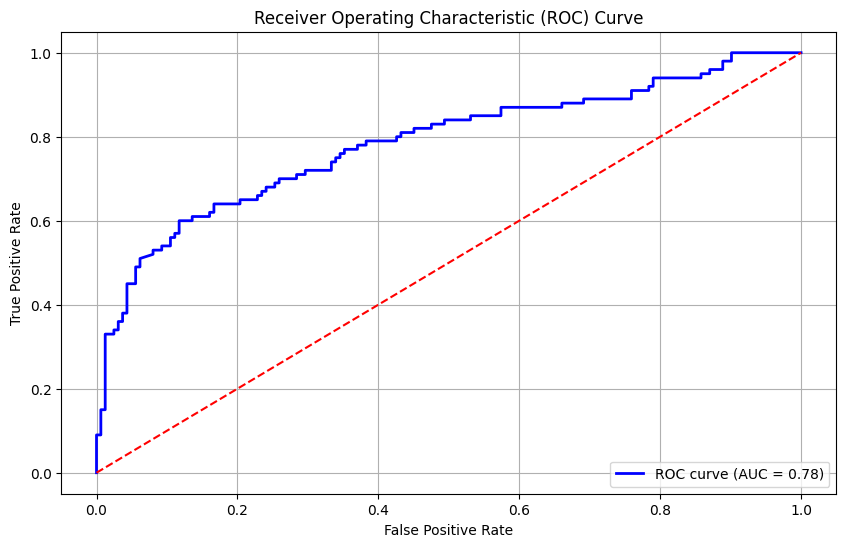

In [108]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [109]:
#print coefficents for interpretation

for feature,coef in zip(x.columns,model.coef_[0]):
  print(f'{feature}:{coef:.2f}')

pclass:-0.99
age:-2.25
fare:0.18
sex_male:-2.61
embarked_Q:-0.41
embarked_S:-0.68
family:-0.10
